# Import required libraries

In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

# unpack the dataset

In [5]:
#load the dataset mnist into variable ojects which is composed of images of resolution 28 * 28 of handwritten digits
objects =  tf.keras.datasets.mnist 
# unpack and load the dataset
(training_images, training_labels),(test_images, test_labels) = objects.load_data()
#splitting it into 80% for training and 20% for testing
training_images,test_images, training_labels,test_labels = train_test_split( training_images, training_labels, test_size=0.2)


The number of images used for training and testing

In [6]:
len(training_images )

48000

In [7]:
len(test_images)

12000

# Sample images used in training the model

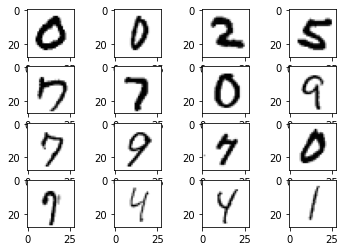

In [8]:
for i in range(16):
    plt.subplot(4,4, i + 1 )
    plt.imshow(training_images[i], cmap = plt.cm.binary)


In [9]:
print(training_images.shape)
print(training_images[0])

(48000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 255 255
   64   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  64 191 255 255 255
  255  64   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 128 255 255 255 255 255
  255 128   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  64 255 255 255 255 255 255
  255 191   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  64 19

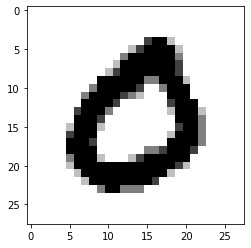

In [10]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Normalization to reduce stress on computation

In [11]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [12]:
print(training_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

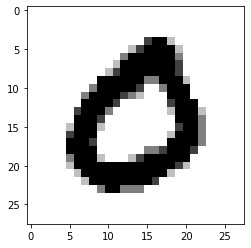

In [13]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Define architecture of the model

In [14]:
# Here the architecure of the model is defined

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
# most go to optimizer is adam, others include stochastic gradient descent
# we gonna calcluate losses using sparse categorica _crossentropy if it were two classes maybe binary categorical crossentropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Training

In [19]:
# model.fit(training_images, training_labels, epochs=5)
history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2884 - accuracy: 0.9168
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1311 - accuracy: 0.9619
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0892 - accuracy: 0.9733
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0680 - accuracy: 0.9795
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0526 - accuracy: 0.9835


In [20]:
history.history

{'accuracy': [0.9168333411216736,
  0.9619166851043701,
  0.9732916951179504,
  0.9794583320617676,
  0.9834583401679993],
 'loss': [0.2883909344673157,
  0.13109202682971954,
  0.08918555825948715,
  0.06801272183656693,
  0.052617911249399185]}

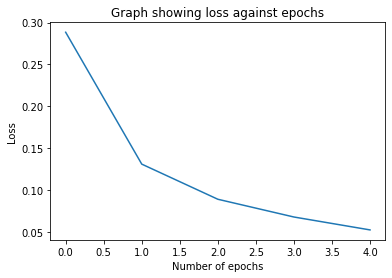

In [23]:
plt.plot(history.history['loss'] )
plt.title('Graph showing loss against epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

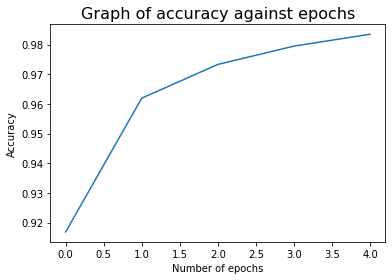

In [24]:
plt.plot(history.history['accuracy'] )
plt.title('Graph of accuracy against epochs', fontdict={'fontsize':16})
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

# Model evaluation

In [25]:

print(model.evaluate(test_images,test_labels))

375/375 [==============================] - 1s 1ms/step - loss: 0.0917 - accuracy: 0.9721
[0.09168972820043564, 0.972083330154419]


In [40]:
pnine = model.predict(test_images[339].reshape(-1,28,28))
test_labels[339], pnine.argmax(axis=1), pnine.max(axis=1)

(9, array([9]), array([0.98619163], dtype=float32))

In [45]:
#Getting 6
six_imgs, six_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 6:
        six_imgs.append(test_images[i])
        six_labels.append(test_labels[i])
        print(i)
        counter +=1
    if counter ==10:
        break;

len(six_imgs), len(six_labels)


8
23
55
56
57
69
77
117
118
135


(10, 10)

In [28]:
#Getting 4
four_imgs, four_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 4:
        print(i)
        four_imgs.append(test_images[i])
        four_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(four_imgs), len(four_labels)

7
24
31
53
58
72
99
102
128
130


(10, 10)

In [29]:
#Getting 9 
nine_imgs, nine_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 9:
        print(i)
        nine_imgs.append(test_images[i])
        nine_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(nine_imgs), len(nine_labels)

32
50
60
68
91
93
94
116
137
159


(10, 10)

In [47]:
pnine[0][8]
print(pnine[0])

[2.5047177e-05 3.1192738e-07 2.2965825e-05 1.5442041e-05 2.0463364e-03
 1.2061760e-06 5.5689192e-08 1.1496583e-02 2.0043140e-04 9.8619163e-01]


<BarContainer object of 10 artists>

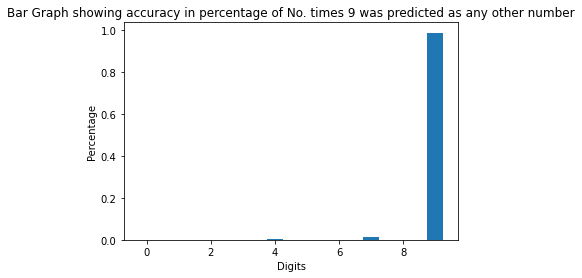

In [50]:
# help(plt.bar)
#Predicting 9
plt.title("Bar Graph showing accuracy in percentage of No. times 9 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pnine[0]))],pnine[0], width=0.5) 

In [49]:
#predicting digit 6
psix = model.predict(test_images[8].reshape(-1,28,28))
test_labels[8], psix.argmax(axis=1), psix.max(axis=1)

(6, array([6]), array([0.9995047], dtype=float32))

<BarContainer object of 10 artists>

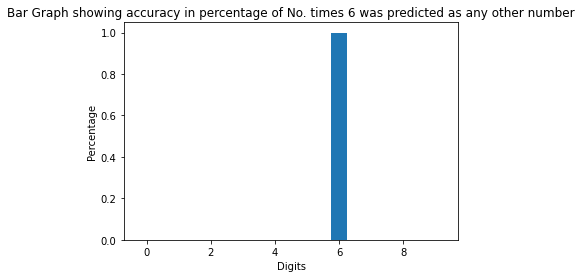

In [52]:
plt.title("Bar Graph showing accuracy in percentage of No. times 6 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(psix[0]))],psix[0], width=0.5) 

In [53]:
pfour = model.predict(test_images[7].reshape(-1,28,28))
test_labels[7], pfour.argmax(axis=1), pfour.max(axis=1)

(4, array([4]), array([0.98949057], dtype=float32))

<BarContainer object of 10 artists>

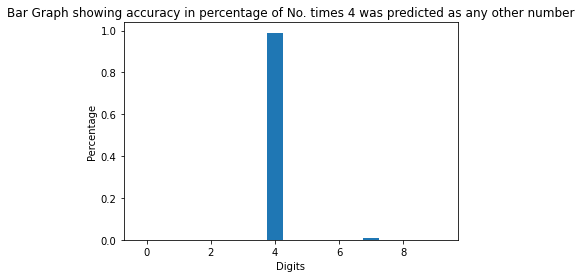

In [54]:
plt.title("Bar Graph showing accuracy in percentage of No. times 4 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pfour[0]))],pfour[0], width=0.5) 

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score

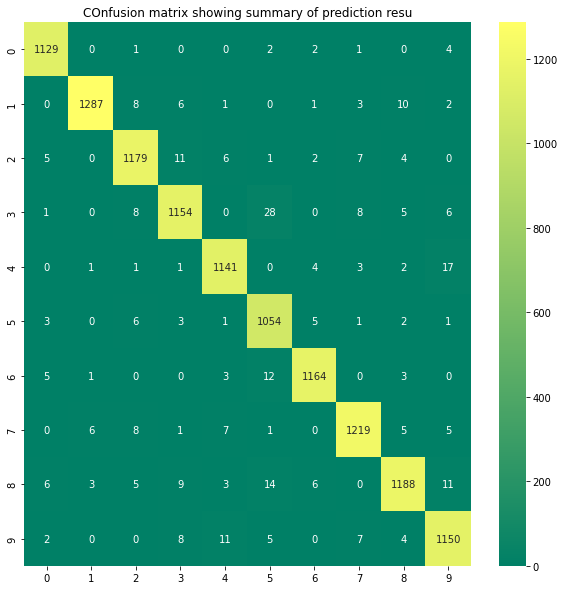

In [56]:
arr = confusion_matrix(test_labels , np.argmax(model.predict(test_images) , axis =1))

plt.figure(figsize=(10 , 10))
sns.heatmap(arr ,
            cmap = 'summer',
            fmt ='g',
            annot=True 
            )
plt.title("COnfusion matrix showing summary of prediction resu")
plt.show()

In [57]:
model.save('mnist_grp1.model')

INFO:tensorflow:Assets written to: mnist_grp1.model/assets


In [58]:
saved_model = tf.keras.models.load_model('mnist_grp1.model')